In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# plots to be rendered inside the notebook
%matplotlib inline

In [2]:
pokemon = pd.read_csv('./pokemon.csv')
print(pokemon.shape)
pokemon.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


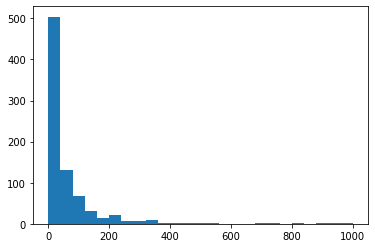

In [5]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);


as we can see data is skewed so lets use access transform instead 

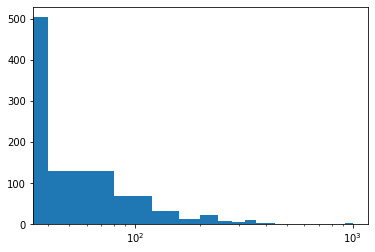

In [6]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

In [7]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [9]:
# lets look at the log of the values here we get limits for our bins for min and max
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

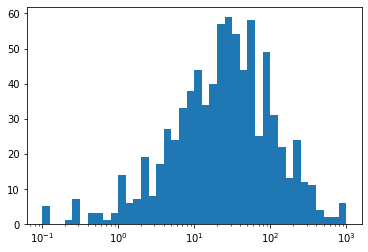

In [10]:
bins = 10 ** np.arange(-1, 3 +0.1 , 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

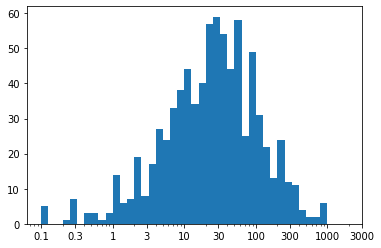

In [14]:
# plot looks alot better showing a unimodel distribution
# but tick marks code be more interprative
bins = 10 ** np.arange(-1, 3 +0.1 , 0.1)
ticks = [0.1,0.3, 1, 3, 10, 30,100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);

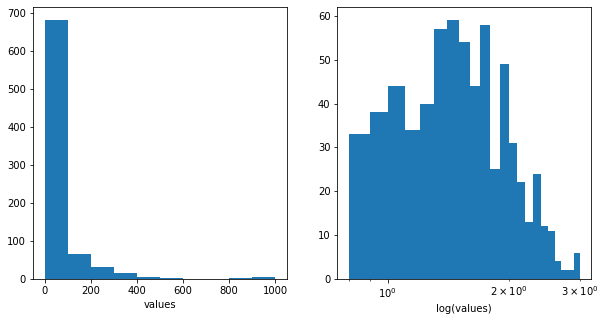

In [23]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['weight'].max()+100, 100)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(pokemon['weight']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xscale('log')
plt.xlabel('log(values)');


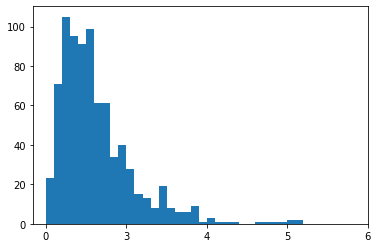

In [26]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
data = pokemon['weight']
bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = False).astype(int));